# Data Analytics and Machine Learning for Store DataSet





# 1- Import Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns   # Data anaylsis Descriptive


pd.set_option('display.max_rows', 550)   # print only 550 rows
pd.set_option('display.max_columns', 500) # print only 500 rows
pd.set_option('display.width', 1000)   # print only 1000 width
pd.options.display.float_format = '{:,.2f}'.format   # print only format like 5.021231 >>  5.02  (precision = 2)


#Machine learning
from sklearn.metrics import mean_squared_error ,r2_score   # measure error of regression models

from sklearn.preprocessing import StandardScaler  # make scaling in Machine learning input

from tqdm import tqdm   # print  the level of iterator (counter)  # Process bar


plt.rcParams['figure.figsize'] = (15,10)  # setup figsize
plt.rcParams['axes.grid'] = True  #remove axis

import warnings
warnings.filterwarnings("ignore")   # remove warnings

# 1- Reading Data

In [2]:
# importing the dataset
df = pd.read_csv('Superstar.csv', encoding= 'ISO-8859-1', low_memory=False)
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,NaN,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.30,2,0.00,106.14,35.46,Medium
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,NaN,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.37,3,0.10,36.04,9.72,Medium
2,48883,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,Hungary,NaN,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.12,4,0.00,29.64,8.17,High
3,11731,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,Sweden,NaN,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.87,3,0.50,-26.05,4.82,High
4,22255,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,NaN,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.67,5,0.10,37.77,4.70,Medium


## **read data from the *path***

# Processing

In [3]:
df.isnull().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

In [4]:
# there is no missing vlues in all records except postl code for this reason we will drop it 
df.drop(['Postal Code'],axis=1,inplace=True)

Check duplicted Values

In [5]:
temp_df = zip(df.isnull().sum().sort_values(ascending=False).index,
              df.isnull().sum().sort_values(ascending=False).values,
              np.round(df.isnull().sum().sort_values(ascending=False).values/len(df)*100, 1))

temp_df = pd.DataFrame(temp_df, columns=['variable', 'missing_count', 'missing_%'])

temp_df['total_count'] = len(df)

temp_df = temp_df[['variable', 'missing_count', 'total_count', 'missing_%']]

temp_df[0:]

,variable,missing_count,total_count,missing_%
0,Row ID,0,51290,0.00
1,Region,0,51290,0.00
2,Shipping Cost,0,51290,0.00
3,Profit,0,51290,0.00
4,Discount,0,51290,0.00
5,Quantity,0,51290,0.00
6,Sales,0,51290,0.00
7,Product Name,0,51290,0.00
8,Sub-Category,0,51290,0.00
9,Category,0,51290,0.00


In [6]:
df.shape

(51290, 23)

Category count

In [7]:
temp_df = []

for i in df.columns:
    temp_df.append([i, len(df[i].value_counts(dropna=False))])

temp_df = pd.DataFrame(temp_df, columns=['variable', 'category_count'])

temp_df.sort_values(by='category_count', inplace=True, ascending=True)

temp_df[0:]

,variable,category_count
14,Category,3
7,Segment,3
22,Order Priority,4
4,Ship Mode,4
11,Market,7
12,Region,13
18,Quantity,14
15,Sub-Category,17
19,Discount,27
10,Country,147


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Market          51290 non-null  object 
 12  Region          51290 non-null  object 
 13  Product ID      51290 non-null  object 
 14  Category        51290 non-null  object 
 15  Sub-Category    51290 non-null  object 
 16  Product Name    51290 non-null  object 
 17  Sales           51290 non-null 

In [9]:
df.dtypes.value_counts()

object     17
float64     4
int64       2
dtype: int64

check for dublicated data

In [10]:
# Check for duplicated records
duplicated_records = df.duplicated().sum()
duplicated_records

0

In [11]:
# Convert data types if necessary
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  object        
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Market          51290 non-null  object        
 12  Region          51290 non-null  object        
 13  Product ID      51290 non-null  object        
 14  Category        51290 non-null  object        
 15  Su

drop unnessary columns 

In [14]:
df.drop(columns=['Row ID','Order ID','Customer ID','Product ID']).to_csv('df2.csv', na_rep='NaN', index_label='index')

# 1- Product/Profit/Price ##

1. Most/Least sold products? 
2. Which products are most profit generating? 
3. How many products are on sale? 
4. What is our most expensive or cheapest product we sell? 
5. Do certain countries prefer certain category of products? 
6. Which product types get critical & high priority? 
7. Work out profitability on Gross Price, any seasonality ? 
8. Do corporate customers buy all category of products or just one type…. cross selling? 
9. What is the relation between order quantity and profit? 
10. Which state generates the most profits? 
11. Are prices the same in all countries/different websites? 
12. What is the pricing model? 
13. Which products are most heavily discounted? 
14. Does one customer have a few different shipping modes, and can we see the price variance? 

In [18]:
df2=pd.read_csv('df2.csv')
df2.head()

,index,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Country,Market,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,0,1/1/2011,2011-06-01,Standard Class,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,Africa,Africa,Office Supplies,Storage,"Tenex Lockers, Blue",408.30,2,0.00,106.14,35.46,Medium
1,1,1/1/2011,2011-08-01,Standard Class,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.37,3,0.10,36.04,9.72,Medium
2,2,1/1/2011,2011-05-01,Second Class,Annie Thurman,Consumer,Budapest,Budapest,Hungary,EMEA,EMEA,Office Supplies,Storage,"Tenex Box, Single Width",66.12,4,0.00,29.64,8.17,High
3,3,1/1/2011,2011-05-01,Second Class,Eugene Moren,Home Office,Stockholm,Stockholm,Sweden,EU,North,Office Supplies,Paper,"Enermax Note Cards, Premium",44.87,3,0.50,-26.05,4.82,High
4,4,1/1/2011,2011-08-01,Standard Class,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.67,5,0.10,37.77,4.70,Medium


In [22]:
df2.columns = df2.columns.str.lower()
df2.columns = df2.columns.str.replace(" ", "_")

In [30]:
df2.head()

,index,order_date,ship_date,ship_mode,customer_name,segment,city,state,country,market,region,category,sub-category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority
0,0,1/1/2011,2011-06-01,Standard Class,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,Africa,Africa,Office Supplies,Storage,"Tenex Lockers, Blue",408.30,2,0.00,106.14,35.46,Medium
1,1,1/1/2011,2011-08-01,Standard Class,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.37,3,0.10,36.04,9.72,Medium
2,2,1/1/2011,2011-05-01,Second Class,Annie Thurman,Consumer,Budapest,Budapest,Hungary,EMEA,EMEA,Office Supplies,Storage,"Tenex Box, Single Width",66.12,4,0.00,29.64,8.17,High
3,3,1/1/2011,2011-05-01,Second Class,Eugene Moren,Home Office,Stockholm,Stockholm,Sweden,EU,North,Office Supplies,Paper,"Enermax Note Cards, Premium",44.87,3,0.50,-26.05,4.82,High
4,4,1/1/2011,2011-08-01,Standard Class,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.67,5,0.10,37.77,4.70,Medium


# 1- Most/Least sold products?

In [31]:
boughts = df2.groupby('product_name').agg({'quantity': 'sum'}).sort_values('quantity',ascending=False)[:10]
boughts

,quantity
product_name,
Staples,876
"Cardinal Index Tab, Clear",337
"Eldon File Cart, Single Width",321
"Rogers File Cart, Single Width",262
"Sanford Pencil Sharpener, Water Color",259
"Stockwell Paper Clips, Assorted Sizes",253
"Avery Index Tab, Clear",252
"Ibico Index Tab, Clear",251
"Smead File Cart, Single Width",250


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Staples'),
  Text(1, 0, 'Cardinal Index Tab, Clear'),
  Text(2, 0, 'Eldon File Cart, Single Width'),
  Text(3, 0, 'Rogers File Cart, Single Width'),
  Text(4, 0, 'Sanford Pencil Sharpener, Water Color'),
  Text(5, 0, 'Stockwell Paper Clips, Assorted Sizes'),
  Text(6, 0, 'Avery Index Tab, Clear'),
  Text(7, 0, 'Ibico Index Tab, Clear'),
  Text(8, 0, 'Smead File Cart, Single Width'),
  Text(9, 0, 'Stanley Pencil Sharpener, Water Color')])

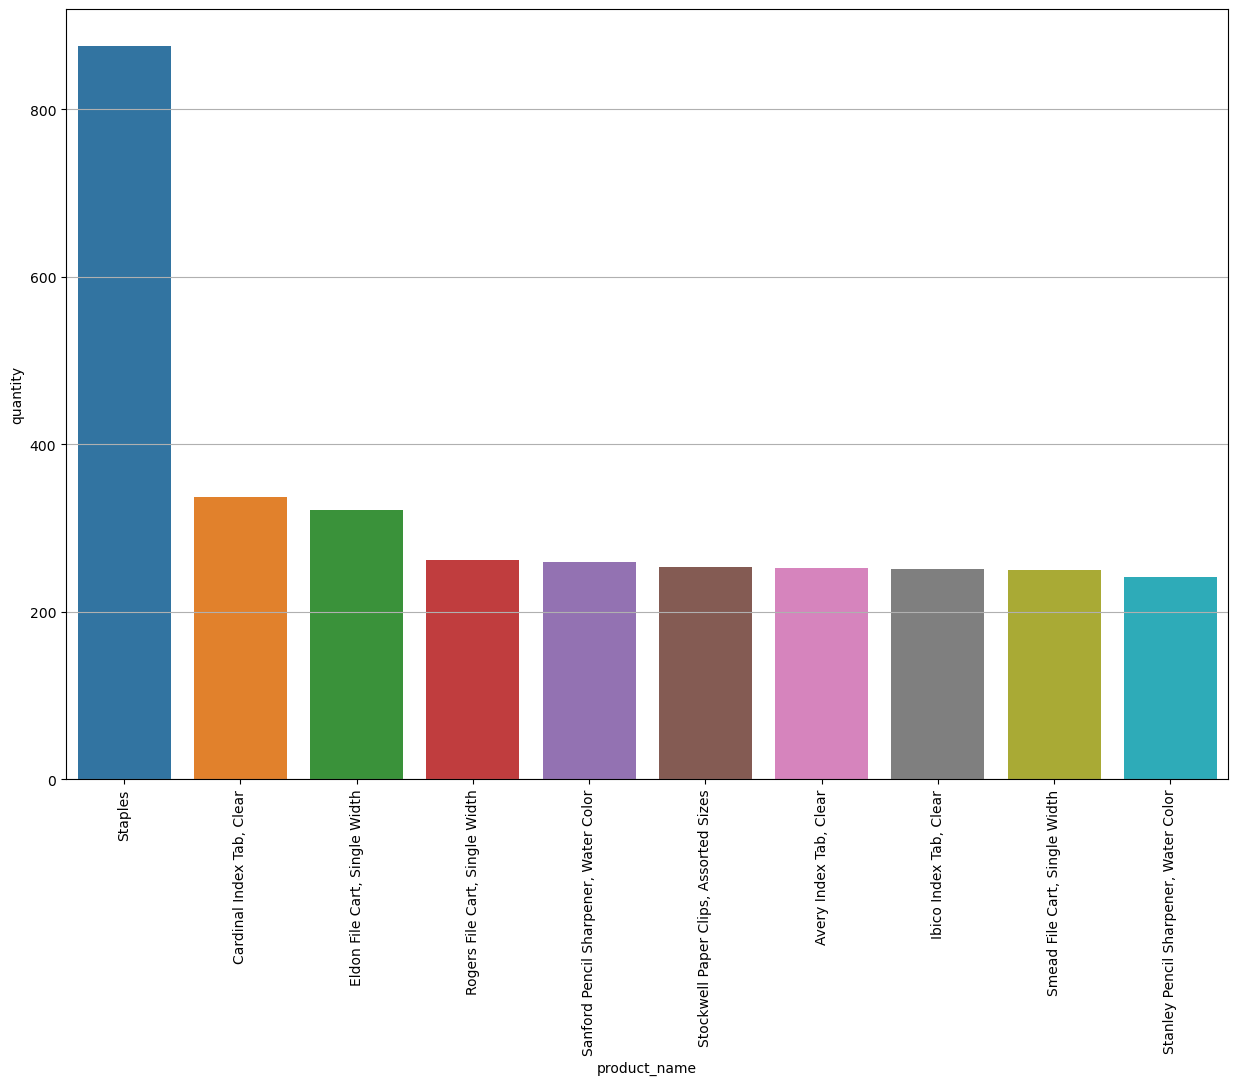

In [32]:
sns.barplot(x='product_name',y='quantity',data=boughts.reset_index())
plt.xticks(rotation = 'vertical')

# # 2-Which products are most profit generating?

In [33]:
profitable_products = pd.DataFrame(df2.groupby(['product_name']).sum()['profit'])
profitable_products.sort_values(by=['profit'], inplace = True, ascending = False)
profitable_products.head(10)

,profit
product_name,
Canon imageCLASS 2200 Advanced Copier,"25,199.93"
"Cisco Smart Phone, Full Size","17,238.52"
"Motorola Smart Phone, Full Size","17,027.11"
"Hoover Stove, Red","11,807.97"
"Sauder Classic Bookcase, Traditional","10,672.07"
"Harbour Creations Executive Leather Armchair, Adjustable","10,427.33"
"Nokia Smart Phone, Full Size","9,938.20"
"Cisco Smart Phone, with Caller ID","9,786.64"
"Nokia Smart Phone, with Caller ID","9,465.33"


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Canon imageCLASS 2200 Advanced Copier'),
  Text(1, 0, 'Cisco Smart Phone, Full Size'),
  Text(2, 0, 'Motorola Smart Phone, Full Size'),
  Text(3, 0, 'Hoover Stove, Red'),
  Text(4, 0, 'Sauder Classic Bookcase, Traditional'),
  Text(5, 0, 'Harbour Creations Executive Leather Armchair, Adjustable'),
  Text(6, 0, 'Nokia Smart Phone, Full Size'),
  Text(7, 0, 'Cisco Smart Phone, with Caller ID'),
  Text(8, 0, 'Nokia Smart Phone, with Caller ID'),
  Text(9, 0, 'Belkin Router, USB')])

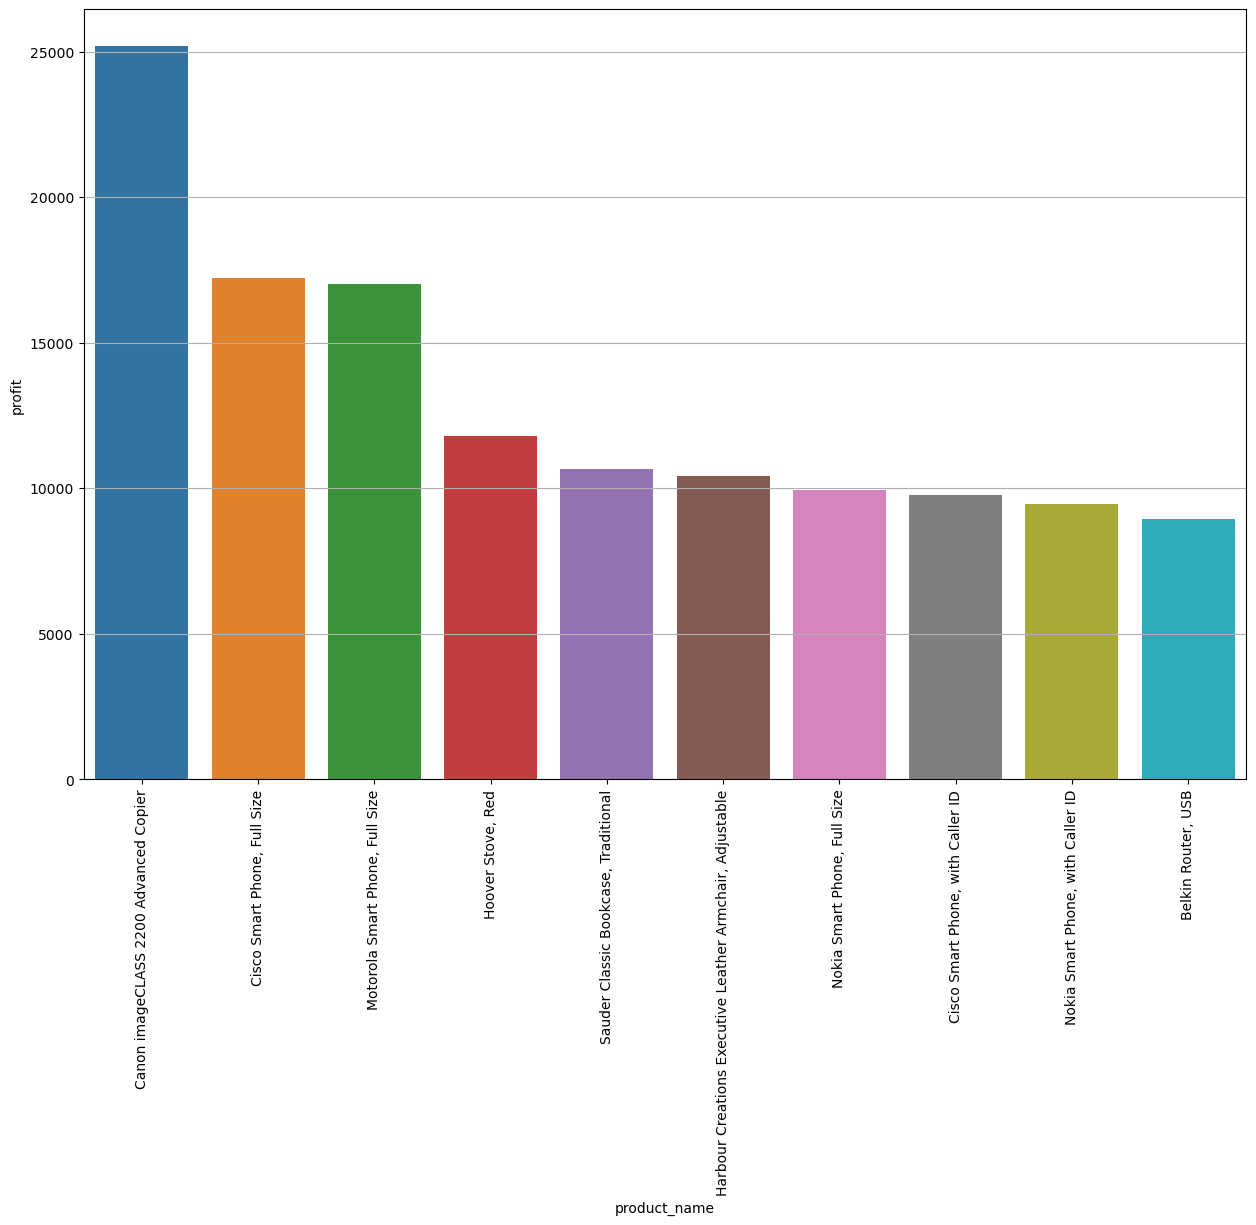

In [26]:
sns.barplot(x='product_name',y='profit',data=profitable_products.head(10).reset_index())
plt.xticks(rotation = 'vertical')

# 3- How many products are on sale?



In [39]:
df2.groupby(['product_name','sales']).sum()

index  quantity  discount  profit  shipping_cost
product_name                                       sales                                                   
"While you Were Out" Message Book, One Form per... 7.42    51088         2      0.00    3.71           0.84
                                                   8.90    38639         6      0.40    6.68           2.26
#10 Gummed Flap White Envelopes, 100/Box           6.61     4523         2      0.20    2.15           0.08
                                                   8.26    11391         2      0.00    3.80           0.69
                                                   9.91    13572         3      0.20    3.22           0.63
...                                                          ...       ...       ...     ...            ...
netTALK DUO VoIP Telephone Service                 83.98   80448         4      0.40   62.99          20.79
                                                   104.98  41318         2      0.00   52.49           7.57
                                                   125.98  32463         3      0.20   47.24          18.81
                                                   167.97  16585         8      0.40  125.98          22.48
                                                   377.93  11304         9      0.20  141.72          28.44

[34238 rows x 5 columns]

In [41]:
profitable_category = pd.DataFrame(df2.groupby(['product_name']).sum()['sales'])
profitable_category.sort_values(by=['sales'], inplace = True, ascending = False)
profitable_category

,sales
product_name,
"Apple Smart Phone, Full Size","86,935.78"
"Cisco Smart Phone, Full Size","76,441.53"
"Motorola Smart Phone, Full Size","73,156.30"
"Nokia Smart Phone, Full Size","71,904.56"
Canon imageCLASS 2200 Advanced Copier,"61,599.82"
...,...
Avery Hi-Liter Pen Style Six-Color Fluorescent Set,7.70
Grip Seal Envelopes,7.07
Xerox 20,6.48


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Apple Smart Phone, Full Size'),
  Text(1, 0, 'Cisco Smart Phone, Full Size'),
  Text(2, 0, 'Motorola Smart Phone, Full Size'),
  Text(3, 0, 'Nokia Smart Phone, Full Size'),
  Text(4, 0, 'Canon imageCLASS 2200 Advanced Copier'),
  Text(5, 0, 'Hon Executive Leather Armchair, Adjustable'),
  Text(6, 0, 'Office Star Executive Leather Armchair, Adjustable'),
  Text(7, 0, 'Harbour Creations Executive Leather Armchair, Adjustable'),
  Text(8, 0, 'Samsung Smart Phone, Cordless'),
  Text(9, 0, 'Nokia Smart Phone, with Caller ID')])

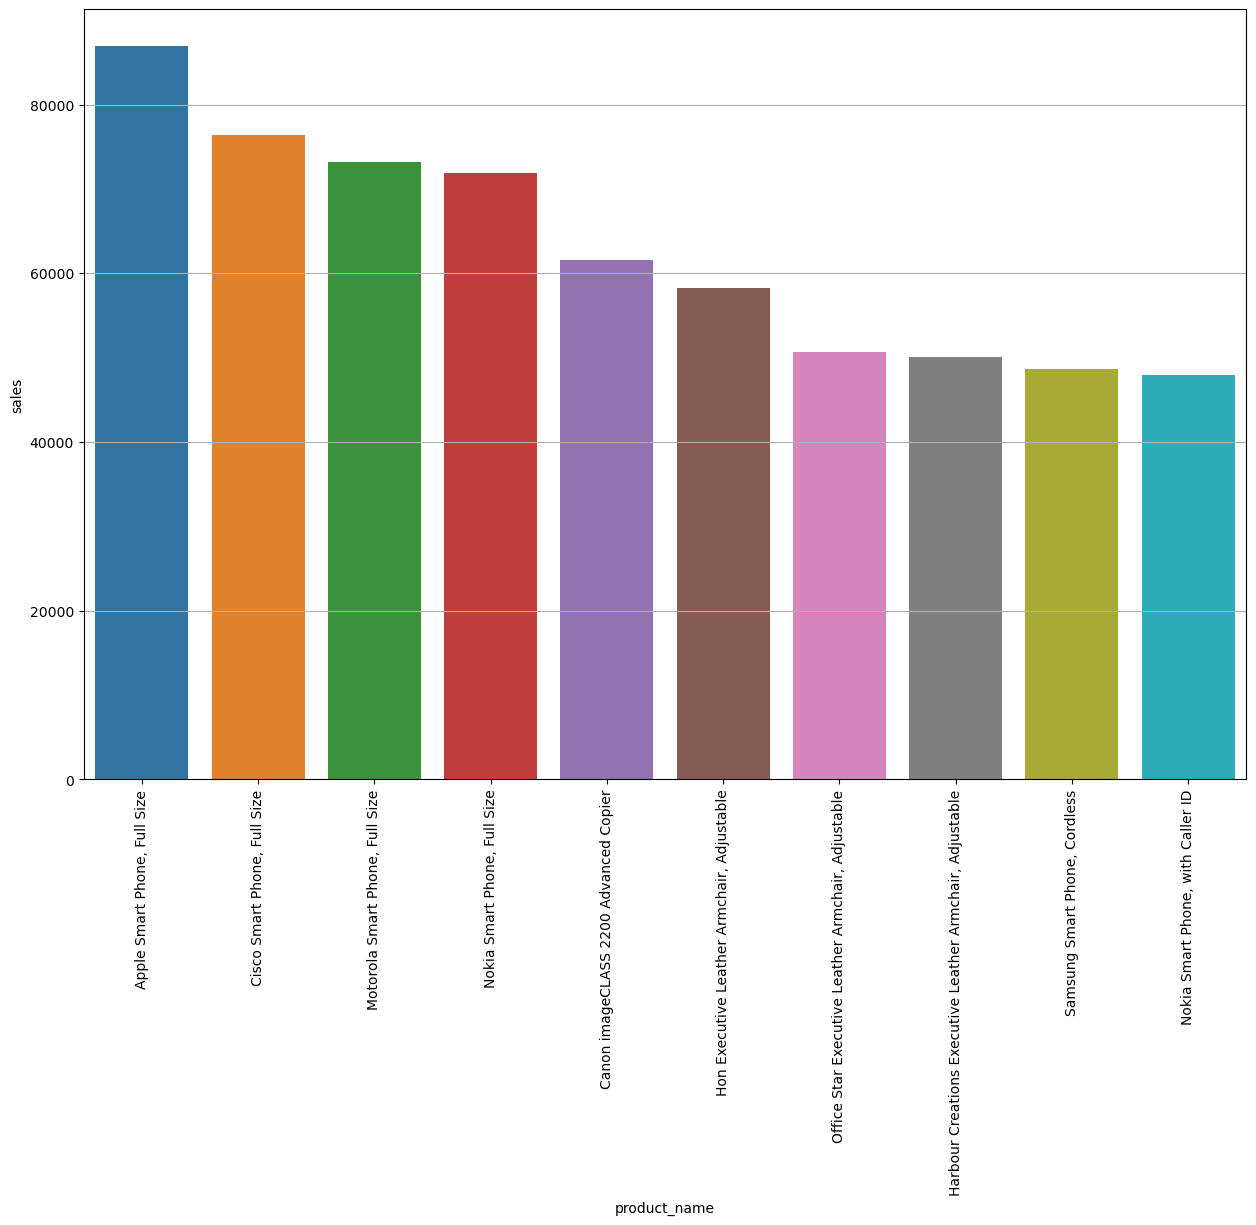

In [44]:
sns.barplot(x='product_name',y='sales',data=profitable_category.head(10).reset_index())
plt.xticks(rotation = 'vertical')

# 4-What is our most expensive or cheapest product we sell?

In [47]:
df2.groupby(["category", "sub-category"], as_index=False)["quantity"].count()

,category,sub-category,quantity
0,Furniture,Bookcases,2411
1,Furniture,Chairs,3434
2,Furniture,Furnishings,3170
3,Furniture,Tables,861
4,Office Supplies,Appliances,1755
5,Office Supplies,Art,4883
6,Office Supplies,Binders,6152
7,Office Supplies,Envelopes,2435
8,Office Supplies,Fasteners,2420
9,Office Supplies,Labels,2606


In [52]:
df2.groupby(["product_name",'category',"sub-category"], as_index=False)["profit"].count().head(100)

,product_name,category,sub-category,profit
0,"""While you Were Out"" Message Book, One Form pe...",Office Supplies,Paper,3
1,"#10 Gummed Flap White Envelopes, 100/Box",Office Supplies,Envelopes,4
2,#10 Self-Seal White Envelopes,Office Supplies,Envelopes,4
3,"#10 White Business Envelopes,4 1/8 x 9 1/2",Office Supplies,Envelopes,7
4,"#10- 4 1/8"" x 9 1/2"" Recycled Envelopes",Office Supplies,Envelopes,10
5,"#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes",Office Supplies,Envelopes,8
6,"#10-4 1/8"" x 9 1/2"" Premium Diagonal Seam Enve...",Office Supplies,Envelopes,2
7,#6 3/4 Gummed Flap White Envelopes,Office Supplies,Envelopes,4
8,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",Office Supplies,Appliances,6
9,1/4 Fold Party Design Invitations & White Enve...,Office Supplies,Paper,2


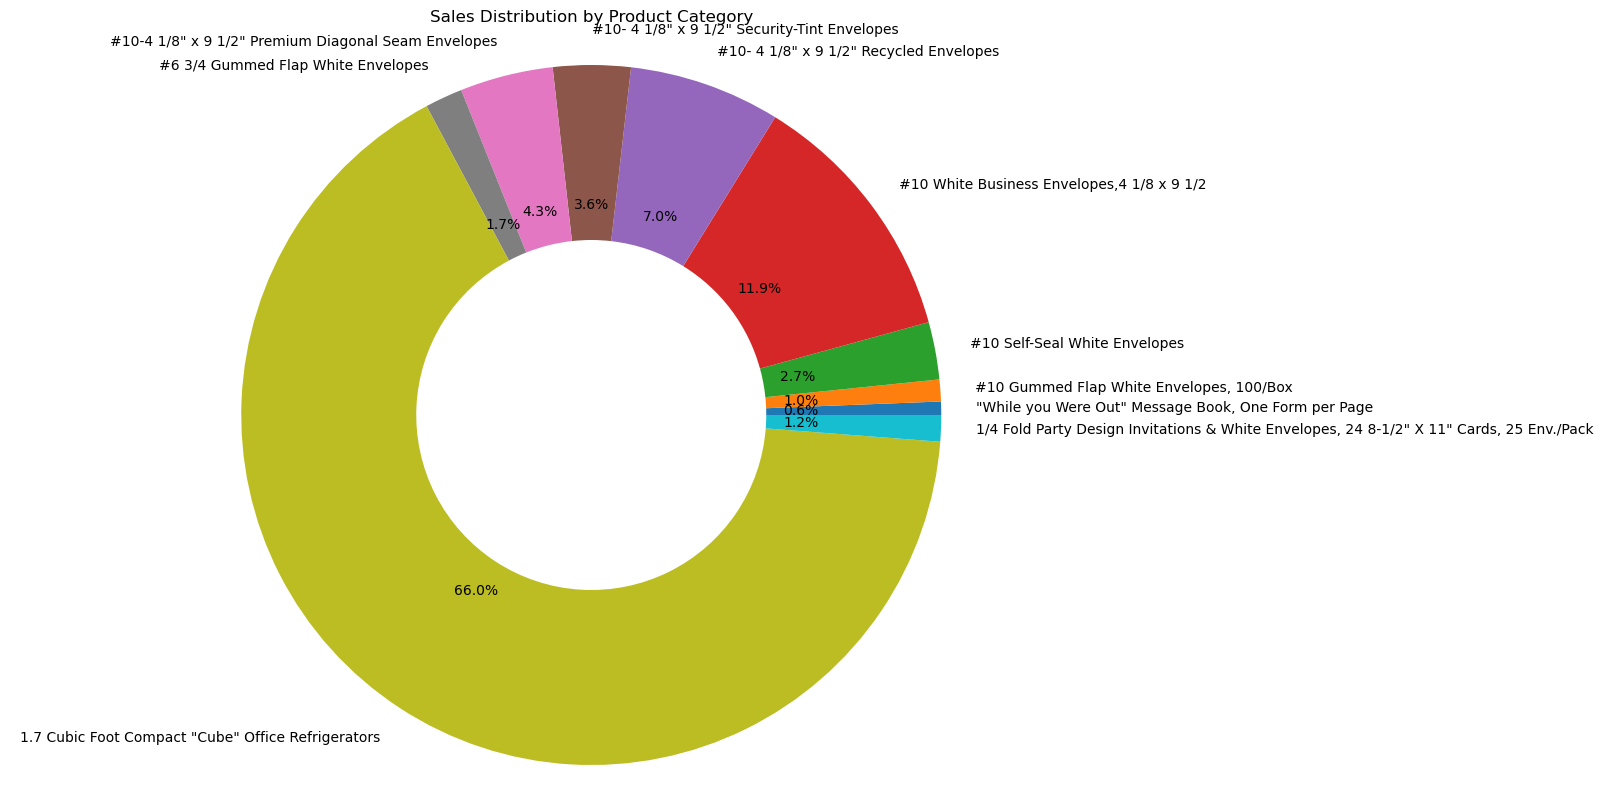

In [57]:
product_category_sales = df2.groupby("product_name")['sales'].sum().head(10)

plt.pie(product_category_sales, labels=product_category_sales.index,
             autopct='%1.1f%%',wedgeprops=dict(width=0.5)
               ) 
plt.title('Sales Distribution by Product Category') 
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle. 
plt.show()

# 5-Do certain countries prefer certain category of products?

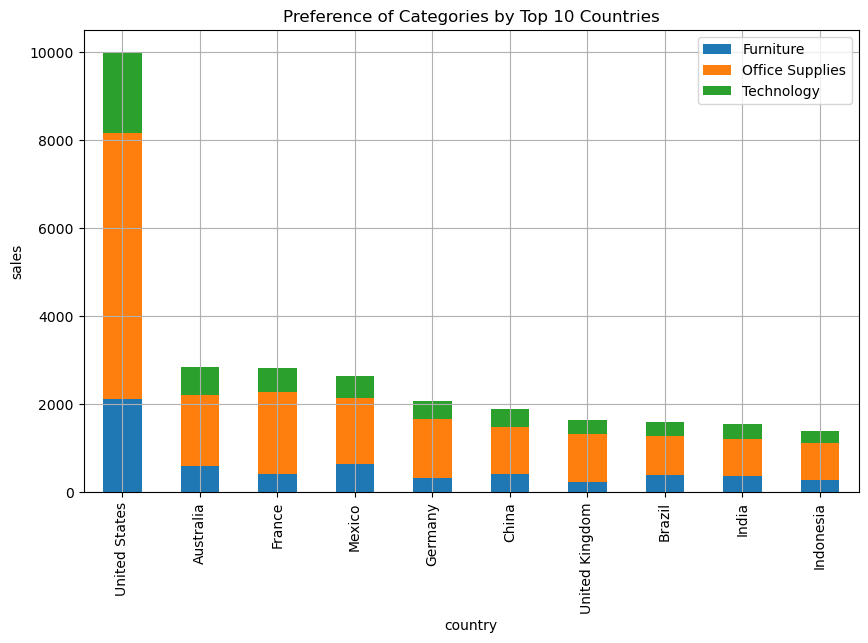

In [75]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with columns 'Country' and 'Category'
# You want to visualize the preference of categories by countries, considering only the top 10 countries

# Group the data by 'Country' and 'Category' and calculate the counts
category_counts = df2.groupby(['country', 'category']).size().unstack()

# Calculate the total count for each country
country_totals = category_counts.sum(axis=1)

# Select the top 10 countries based on the total count
top_10_countries = country_totals.nlargest(10).index

# Filter the data for the top 10 countries
category_counts_top_10 = category_counts.loc[top_10_countries]

# Plotting a stacked bar chart
category_counts_top_10.plot(kind='bar', stacked=True, figsize=(10, 6))

# Set labels and title
plt.xlabel('country')
plt.ylabel('sales')
plt.title('Preference of Categories by Top 10 Countries')

# Display the legend
plt.legend()

# Show the plot
plt.show()

# 6-Which product types get critical & high priority?

# Predictive Questions:





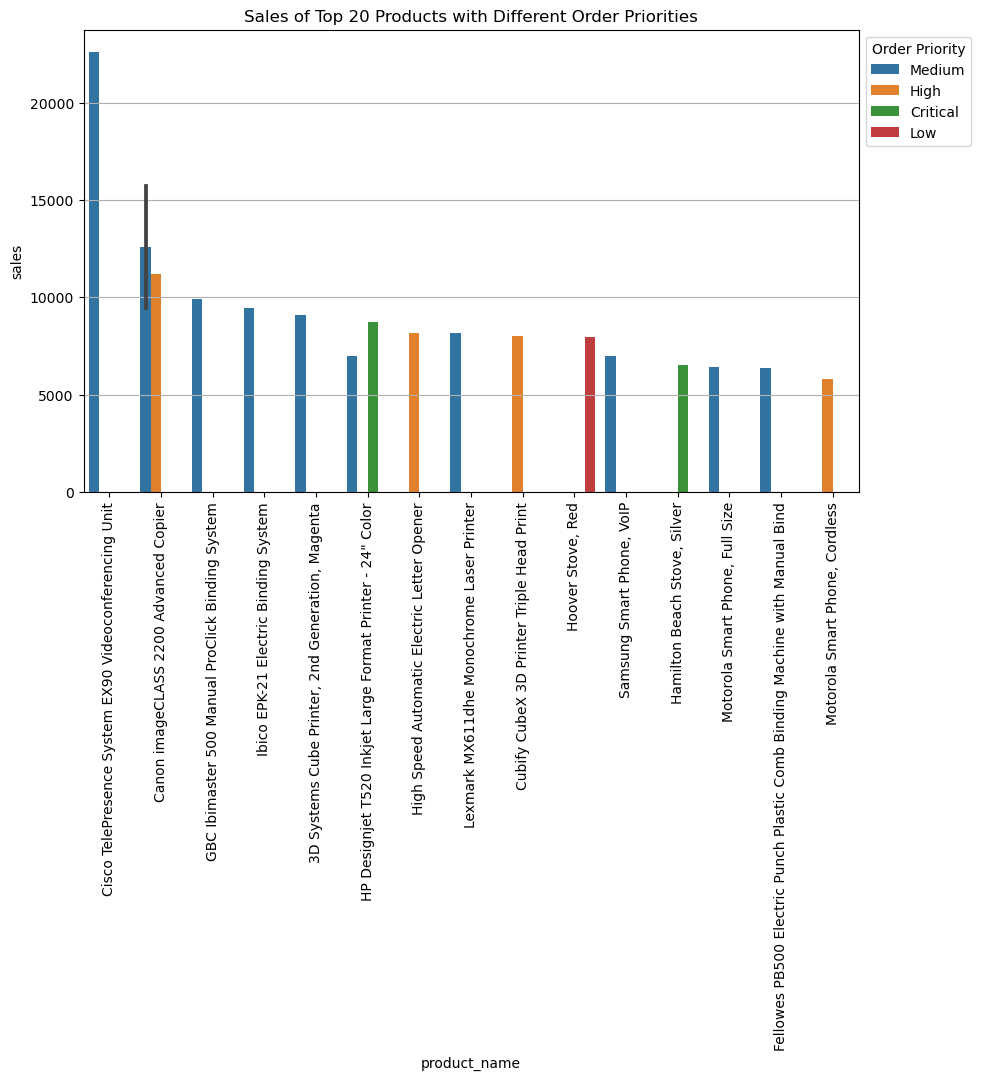

In [85]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df2' with columns 'product_name', 'sales', and 'order_priority'
# You want to visualize the sales of the top 20 products with different order priorities

# Filter the data for the top 20 products
top_20_products = df2.nlargest(20, 'sales')

# Create the plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='product_name', y='sales', hue='order_priority', data=top_20_products)

# Set labels and title
plt.xlabel('product_name')
plt.ylabel('sales')
plt.xticks(rotation = 'vertical')
plt.title('Sales of Top 20 Products with Different Order Priorities')

# Display the legend
plt.legend(title='Order Priority', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()

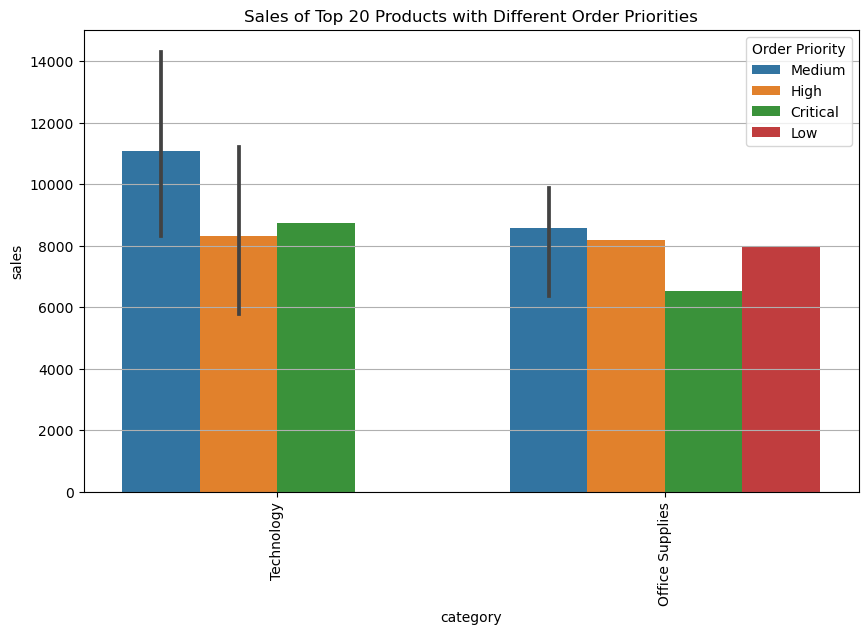

In [86]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df2' with columns 'product_name', 'sales', and 'order_priority'
# You want to visualize the sales of the top 20 products with different order priorities

# Filter the data for the top 20 products
top_20_Category = df2.nlargest(20, 'sales')

# Create the plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='category', y='sales', hue='order_priority', data=top_20_products)

# Set labels and title
plt.xlabel('category')
plt.ylabel('sales')
plt.xticks(rotation = 'vertical')
plt.title('Sales of Top 20 Products with Different Order Priorities')

# Display the legend
plt.legend(title='Order Priority', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()

# 7-Work out profitability on Gross Price, any seasonality ?

In [88]:
data10 = df2.sort_values('profit',ascending=False).head(10)[['customer_name','profit']]
data10

,customer_name,profit
8898,Tamara Chand,"8,399.98"
38848,Raymond Buch,"6,719.98"
29946,Hunter Lopez,"5,039.99"
30124,Adrian Barton,"4,946.37"
37929,Sanjit Chand,"4,630.48"
17421,Patrick Jones,"3,979.08"
38234,Tom Ashbrook,"3,919.99"
25346,Christopher Martinez,"3,177.47"
2756,Carol Adams,"2,939.31"
12813,Cynthia Arntzen,"2,817.99"


In [100]:
df2['order_date'] = pd.to_datetime(df2['order_date'])

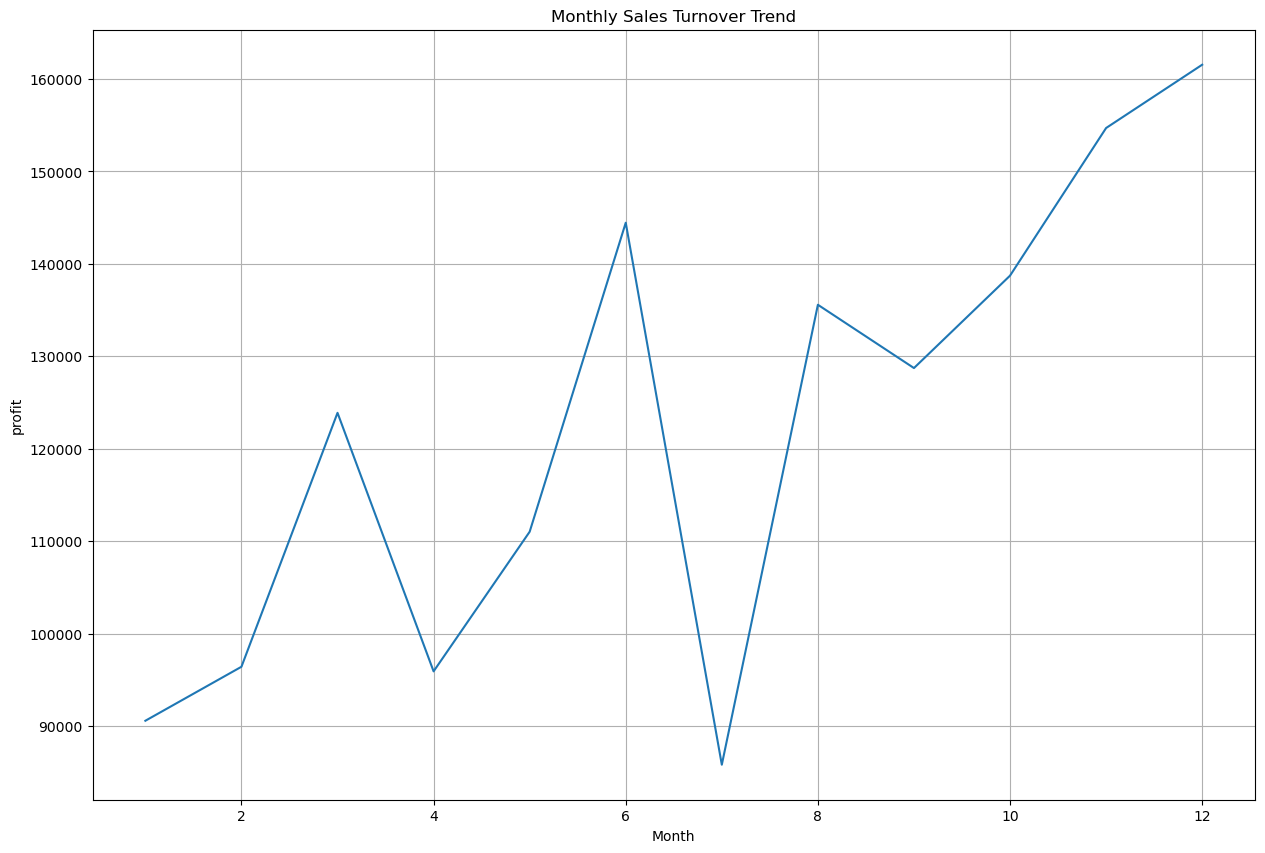

In [103]:
import datetime
import calendar
import matplotlib.pyplot as plt

df2['Month'] = df2['order_date'].dt.month
monthly_sales = df2.groupby('Month')['profit'].sum().reset_index()
sns.lineplot(x='Month', y='profit', data=monthly_sales)
plt.title('Monthly Sales Turnover Trend')
plt.show()


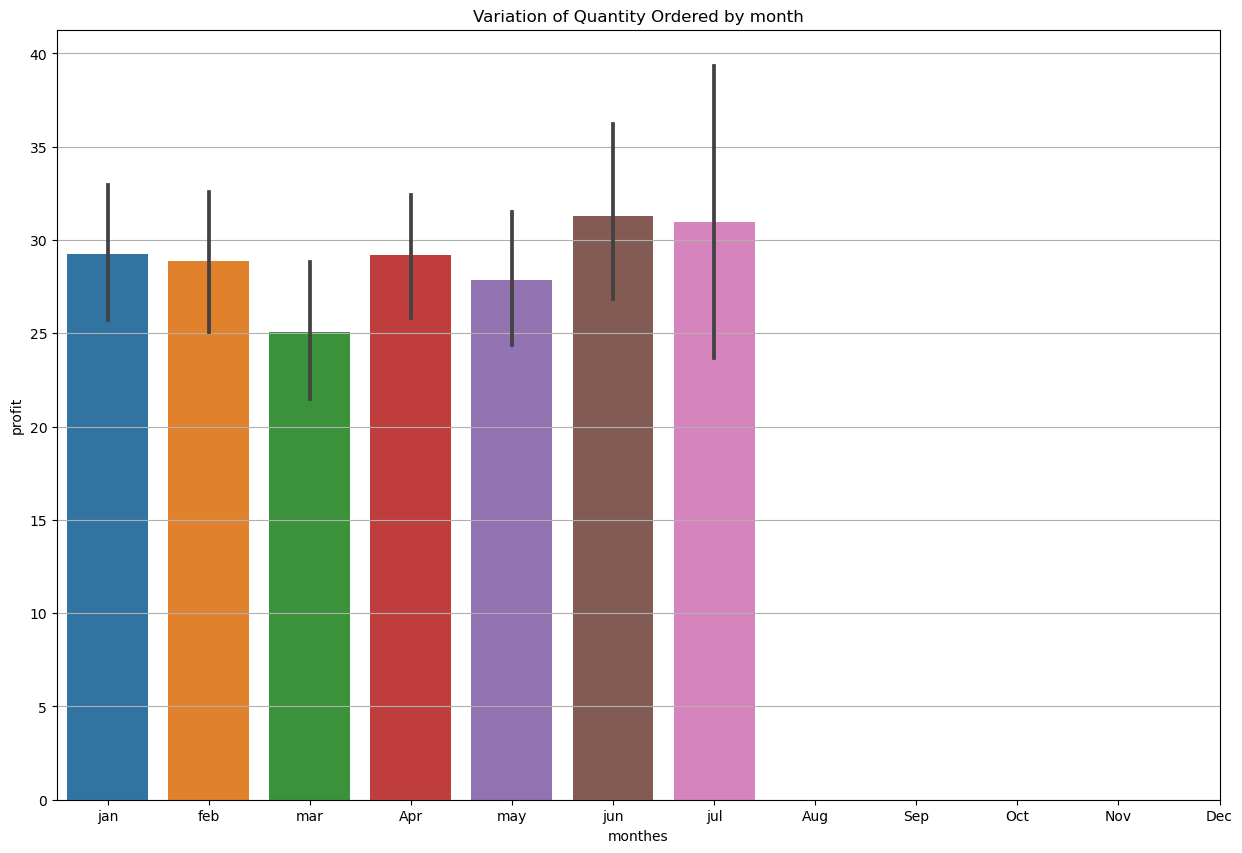

In [107]:

df2['monthes'] = df2['order_date'].dt.dayofweek
sns.barplot(x='monthes', y='profit', data=df2)
plt.title('Variation of Quantity Ordered by month')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6,7,8,9,10,11], labels=['jan', 'feb', 'mar', 'Apr', 'may', 'jun', 'jul','Aug','Sep','Oct','Nov','Dec'])
plt.show()

# 8-Do corporate customers buy all category of products or just one type…. cross selling?

In [109]:
profitable_segment = pd.DataFrame(df2.groupby(['segment']).sum()['profit'])
profitable_segment.sort_values(by=['profit'], inplace = True, ascending = False)
profitable_segment

,profit
segment,
Consumer,"749,239.78"
Corporate,"441,208.33"
Home Office,"277,009.18"


(array([0, 1, 2]),
 [Text(0, 0, 'Consumer'), Text(1, 0, 'Corporate'), Text(2, 0, 'Home Office')])

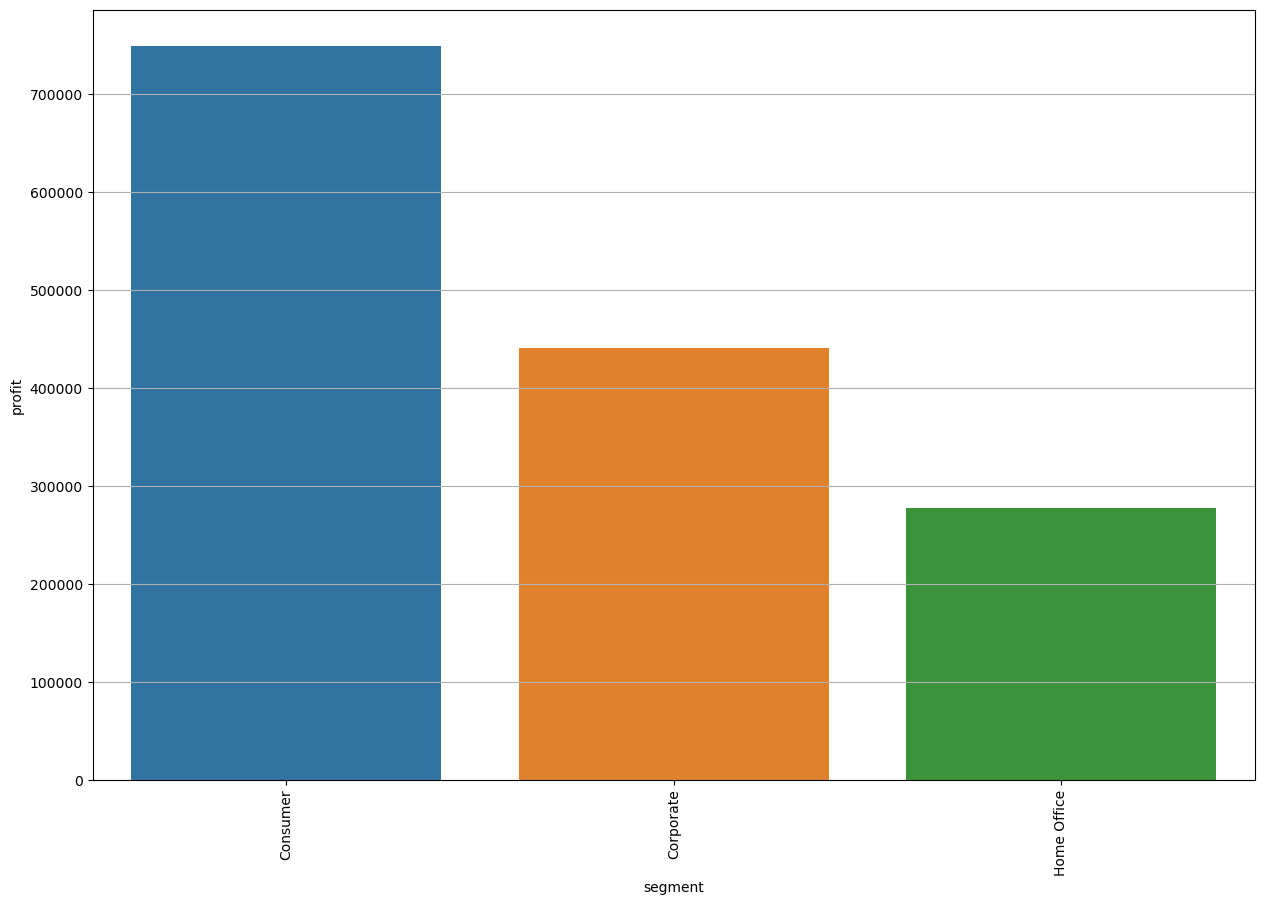

In [110]:
sns.barplot(x='segment',y='profit',data=profitable_segment.reset_index())
plt.xticks(rotation = 'vertical')

# 9-What is the relation between order quantity and profit?

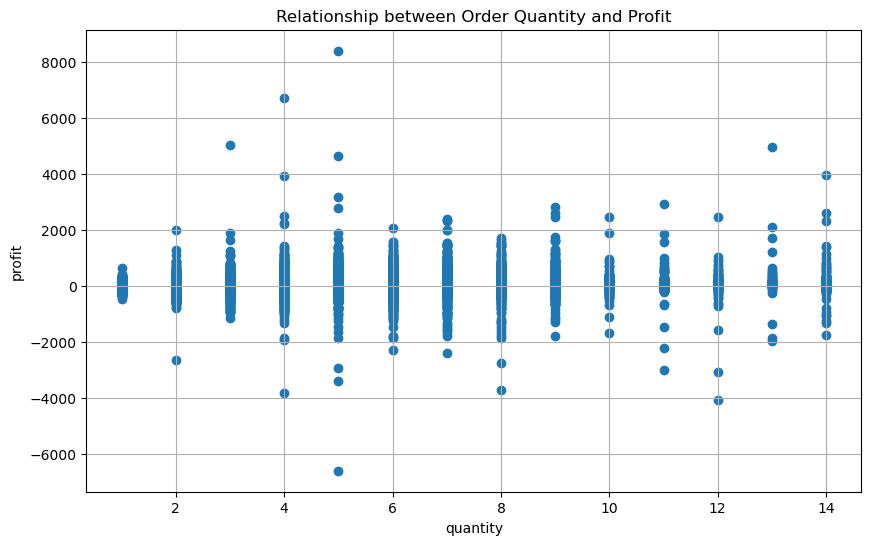

In [111]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with columns 'Order_Quantity' and 'Profit'

# Plotting the relationship between order quantity and profit
plt.figure(figsize=(10, 6))
plt.scatter(df2['quantity'], df2['profit'])
plt.xlabel('quantity')
plt.ylabel('profit')
plt.title('Relationship between Order Quantity and Profit')
plt.grid(True)
plt.show()

# 10-Which state generates the most profits?

In [114]:
profitable_state = pd.DataFrame(df2.groupby(['state']).sum()['profit']).head(20)
profitable_state.sort_values(by=['profit'], inplace = True, ascending = False)
profitable_state

,profit
state,
Al Basrah,"3,722.52"
'Amman,"1,797.99"
Ad Dawhah,"1,502.88"
Abruzzi,977.76
Al Bahr Al Ahmar,387.03
Aichi,360.81
'Asir,310.65
Acre,193.90
Al Buhayrah,83.61


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Al Basrah'),
  Text(1, 0, "'Amman"),
  Text(2, 0, 'Ad Dawhah'),
  Text(3, 0, 'Abruzzi'),
  Text(4, 0, 'Al Bahr Al Ahmar'),
  Text(5, 0, 'Aichi'),
  Text(6, 0, "'Asir"),
  Text(7, 0, 'Acre'),
  Text(8, 0, 'Al Buhayrah'),
  Text(9, 0, 'Adamaoua'),
  Text(10, 0, 'Afyonkarahisar'),
  Text(11, 0, 'Aceh'),
  Text(12, 0, 'Abuja Capital Territory'),
  Text(13, 0, 'Aksaray'),
  Text(14, 0, 'Adamawa'),
  Text(15, 0, "'Ajman"),
  Text(16, 0, 'Adiyaman'),
  Text(17, 0, 'Akwa Ibom'),
  Text(18, 0, 'Abia'),
  Text(19, 0, 'Adana')])

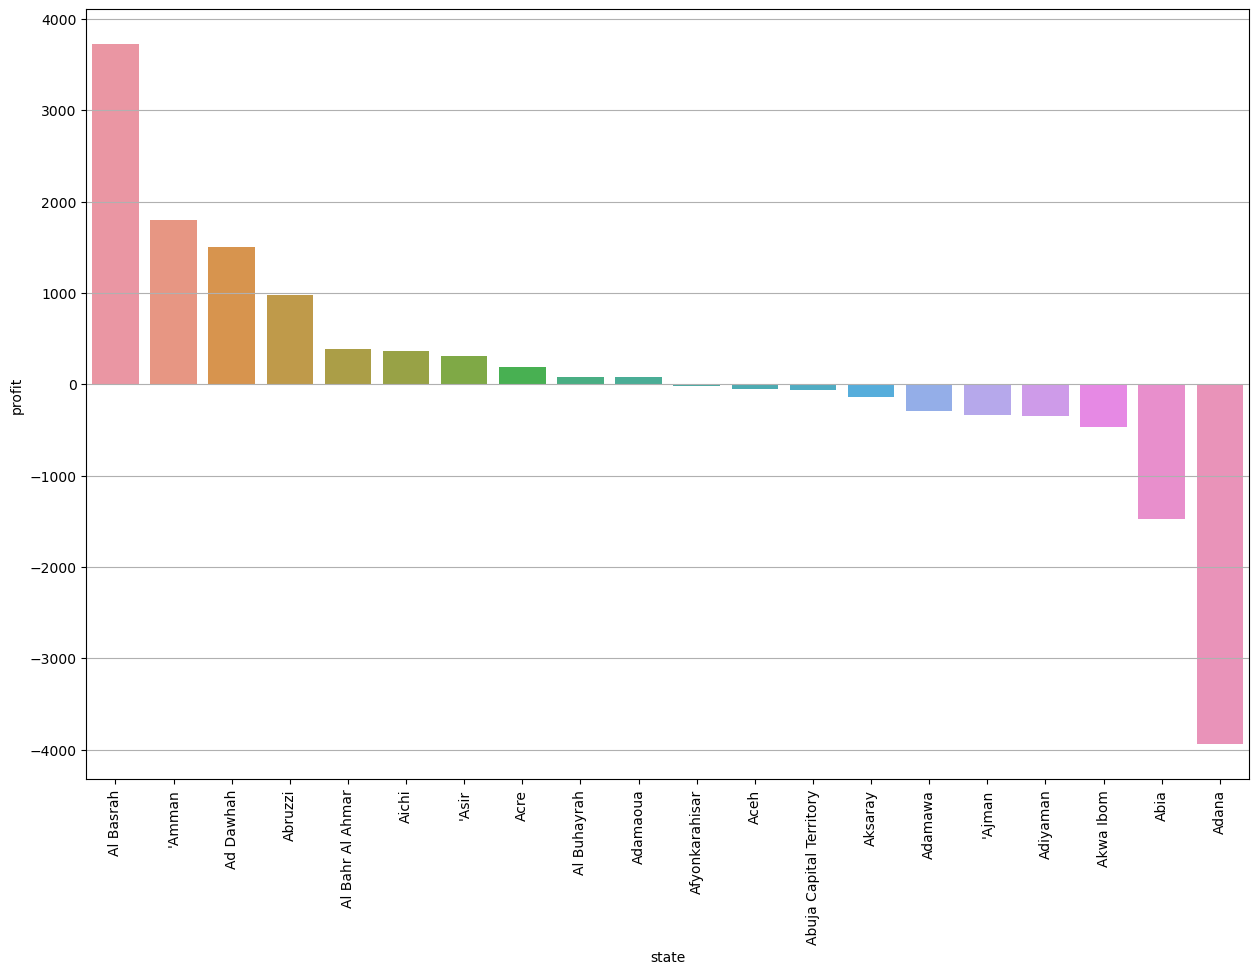

In [115]:
sns.barplot(x='state',y='profit',data=profitable_state.head(20).reset_index())
plt.xticks(rotation = 'vertical')

# 11-Are prices the same in all countries/different websites?

In [118]:
df2.groupby('country').agg({'shipping_cost':'mean'}).sort_values('shipping_cost', ascending=False).head(10)

,shipping_cost
country,
Taiwan,155.66
Chad,148.97
Lesotho,135.65
Montenegro,93.94
Slovenia,61.22
Republic of the Congo,59.30
Central African Republic,57.63
Namibia,50.37
Bangladesh,46.40


# 12-Which products are most heavily discounted?

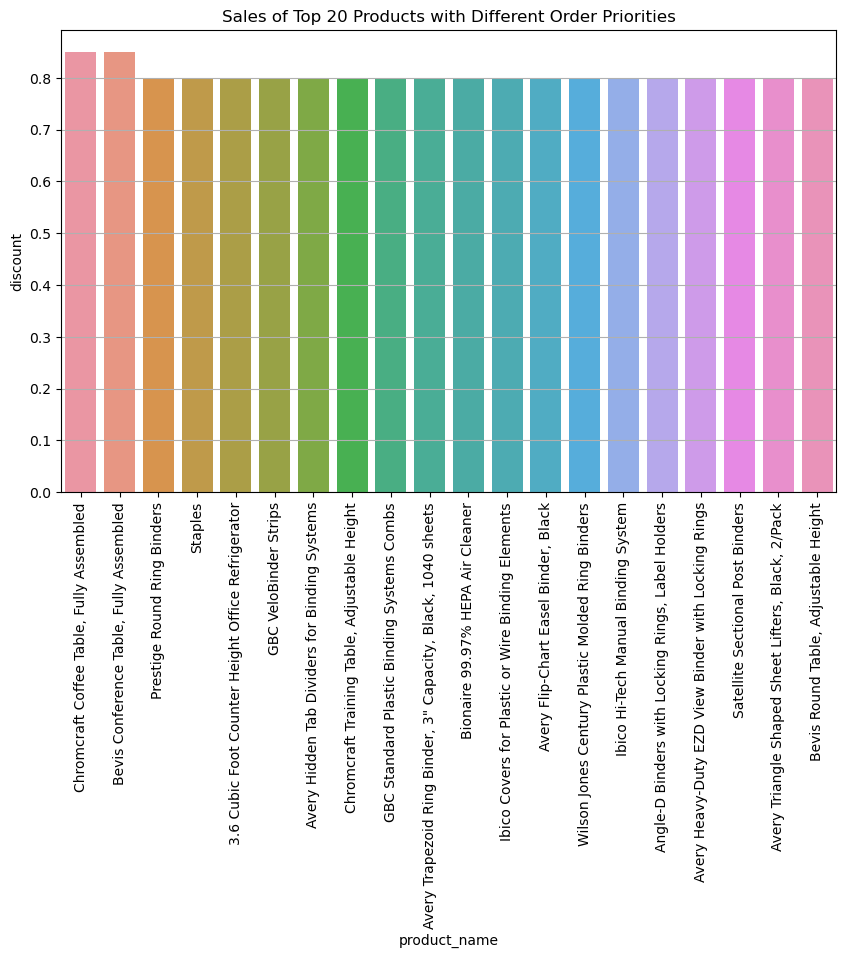

In [123]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df2' with columns 'product_name', 'sales', and 'order_priority'
# You want to visualize the sales of the top 20 products with different order priorities

# Filter the data for the top 20 products
top_20_products = df2.nlargest(20, 'discount')

# Create the plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='product_name', y='discount', data=top_20_products)

# Set labels and title
plt.xlabel('product_name')
plt.ylabel('discount')
plt.xticks(rotation = 'vertical')
plt.title('Sales of Top 20 Products with Different Order Priorities')

# Show the plot
plt.show()

# 13-Does one customer have a few different shipping modes, and can we see the price variance?

In [127]:
# Find duplicate customer names
duplicate_customers = df2[df2.duplicated('customer_name', keep=False)]['customer_name'].unique()

# Print the redundant customer names
duplicate_customers

array(['Toby Braunhardt', 'Joseph Holt', 'Annie Thurman', 'Eugene Moren',
       "Patrick O'Donnell", 'Liz Carlisle', 'David Kendrick',
       'Stephanie Phelps', 'Dave Hallsten', "Patrick O'Brill",
       'Gene Hale', 'Ralph Ritter', 'Ionia McGrath', 'Tom Prescott',
       'Todd Sumrall', 'Ruben Dartt', 'Tom Boeckenhauer',
       'Vicky Freymann', 'Katherine Hughes', 'Dave Brooks',
       'Giulietta Weimer', 'Shahid Collister', 'Bryan Spruell',
       'Chris McAfee', 'Randy Ferguson', 'Logan Haushalter', 'Lori Olson',
       'Ed Ludwig', 'Brian DeCherney', 'Jeremy Farry', 'Edward Hooks',
       'Hallie Redmond', 'Aaron Smayling', 'Benjamin Patterson',
       'Rachel Payne', 'Jennifer Braxton', 'Pete Armstrong',
       'Victoria Pisteka', 'Lynn Smith', 'Kunst Miller',
       'Katharine Harms', 'Adam Bellavance', 'Matt Hagelstein',
       'Dianna Wilson', 'Liz Thompson', 'Mike Caudle', 'Yana Sorensen',
       'Muhammed MacIntyre', 'Nick Zandusky', 'Monica Federle',
       'William Brown

In [131]:
# Check if redundant customers have multiple shipping modes
for customer in duplicate_customers:
    shipping_modes = df2[df2['customer_name'] == customer]['ship_mode'].unique()
    if len(shipping_modes) > 1:
        print(f"Customer '{customer}' has multiple shipping modes: {', '.join(shipping_modes)}")
    else:
        print(f"Customer '{customer}' has only one shipping mode: {shipping_modes[0]}")

Customer 'Toby Braunhardt' has multiple shipping modes: Standard Class, First Class, Second Class, Same Day
Customer 'Joseph Holt' has multiple shipping modes: Standard Class, First Class, Second Class, Same Day
Customer 'Annie Thurman' has multiple shipping modes: Second Class, Standard Class, First Class, Same Day
Customer 'Eugene Moren' has multiple shipping modes: Second Class, Standard Class, First Class, Same Day
Customer 'Patrick O'Donnell' has multiple shipping modes: Second Class, Standard Class, First Class
Customer 'Liz Carlisle' has multiple shipping modes: First Class, Standard Class, Second Class, Same Day
Customer 'David Kendrick' has multiple shipping modes: Second Class, First Class, Standard Class
Customer 'Stephanie Phelps' has multiple shipping modes: Second Class, Standard Class, First Class
Customer 'Dave Hallsten' has multiple shipping modes: Standard Class, Second Class, First Class
Customer 'Patrick O'Brill' has multiple shipping modes: Standard Class, First Cl

Customer 'Ted Butterfield' has multiple shipping modes: First Class, Second Class, Standard Class, Same Day
Customer 'Lena Hernandez' has multiple shipping modes: Standard Class, Second Class, First Class, Same Day
Customer 'Jill Stevenson' has multiple shipping modes: Second Class, Standard Class, First Class, Same Day
Customer 'Laurel Beltran' has multiple shipping modes: Second Class, Standard Class, Same Day, First Class
Customer 'Dan Lawera' has multiple shipping modes: Standard Class, First Class, Second Class, Same Day
Customer 'Erin Smith' has multiple shipping modes: Standard Class, First Class, Second Class, Same Day
Customer 'Guy Phonely' has multiple shipping modes: Standard Class, Second Class, Same Day, First Class
Customer 'Jack Lebron' has multiple shipping modes: First Class, Standard Class, Second Class, Same Day
Customer 'Parhena Norris' has multiple shipping modes: Standard Class, Second Class, First Class, Same Day
Customer 'Bobby Odegard' has multiple shipping mod

Customer 'Hunter Lopez' has multiple shipping modes: Standard Class, First Class, Second Class, Same Day
Customer 'Emily Burns' has multiple shipping modes: Second Class, First Class, Standard Class
Customer 'Tony Molinari' has multiple shipping modes: Standard Class, Second Class, First Class, Same Day
Customer 'Anna Häberlin' has multiple shipping modes: Standard Class, First Class, Second Class
Customer 'Christine Sundaresam' has multiple shipping modes: Standard Class, Second Class, First Class, Same Day
Customer 'Pamela Coakley' has multiple shipping modes: First Class, Standard Class, Second Class
Customer 'Sam Craven' has multiple shipping modes: Second Class, Same Day, Standard Class, First Class
Customer 'Jason Klamczynski' has multiple shipping modes: First Class, Second Class, Same Day, Standard Class
Customer 'Cari Schnelling' has multiple shipping modes: Second Class, Standard Class, Same Day, First Class
Customer 'Bill Donatelli' has multiple shipping modes: Standard Clas

Customer 'Theresa Swint' has multiple shipping modes: Standard Class, Same Day, First Class, Second Class
Customer 'Shaun Weien' has multiple shipping modes: Standard Class, Second Class, First Class
Customer 'Scot Coram' has multiple shipping modes: Second Class, Standard Class, Same Day
Customer 'Mike Vittorini' has multiple shipping modes: Second Class, Standard Class, Same Day, First Class
Customer 'Mitch Willingham' has multiple shipping modes: Second Class, Standard Class, First Class, Same Day
Customer 'Sandra Flanagan' has multiple shipping modes: Standard Class, Second Class, First Class, Same Day
Customer 'Eva Jacobs' has multiple shipping modes: Standard Class, Second Class, Same Day, First Class
Customer 'Anne Pryor' has multiple shipping modes: Standard Class, Second Class, First Class, Same Day
Customer 'Christopher Conant' has multiple shipping modes: Standard Class, First Class, Second Class, Same Day
Customer 'Astrea Jones' has multiple shipping modes: Standard Class, 

Customer 'Matthew Clasen' has multiple shipping modes: Second Class, Standard Class, Same Day, First Class
Customer 'Maya Herman' has multiple shipping modes: Standard Class, First Class, Second Class, Same Day
Customer 'Arthur Prichep' has multiple shipping modes: Standard Class, Second Class, First Class, Same Day
Customer 'Arthur Wiediger' has multiple shipping modes: Standard Class, First Class, Same Day, Second Class
Customer 'Grant Thornton' has multiple shipping modes: Standard Class, Same Day, First Class, Second Class
Customer 'Darren Powers' has multiple shipping modes: Standard Class, Second Class, First Class, Same Day
Customer 'Jasper Cacioppo' has multiple shipping modes: Standard Class, Second Class, First Class, Same Day
Customer 'Tom Stivers' has multiple shipping modes: Second Class, Standard Class, First Class
Customer 'Brad Thomas' has multiple shipping modes: Standard Class, First Class, Second Class, Same Day
Customer 'Brad Eason' has multiple shipping modes: Stan

Customer 'Toby Gnade' has multiple shipping modes: Standard Class, Second Class, First Class, Same Day
Customer 'Gary Zandusky' has multiple shipping modes: Standard Class, Second Class, Same Day, First Class
Customer 'Chad Sievert' has multiple shipping modes: Standard Class, First Class, Second Class
Customer 'Julia Barnett' has multiple shipping modes: Standard Class, Second Class, First Class
Customer 'Naresj Patel' has multiple shipping modes: Second Class, Standard Class, First Class
Customer 'Sonia Sunley' has multiple shipping modes: Standard Class, Second Class, Same Day, First Class
Customer 'Hilary Holden' has multiple shipping modes: Standard Class, Second Class, First Class, Same Day
Customer 'Shirley Schmidt' has multiple shipping modes: Standard Class, First Class, Second Class, Same Day
Customer 'Phillip Flathmann' has multiple shipping modes: Standard Class, Second Class, First Class, Same Day
Customer 'Christine Abelman' has multiple shipping modes: First Class, Stand

Customer 'Liz Willingham' has multiple shipping modes: Standard Class, First Class, Second Class
Customer 'Pauline Johnson' has multiple shipping modes: First Class, Standard Class, Same Day, Second Class
Customer 'Daniel Raglin' has multiple shipping modes: Second Class, Standard Class, First Class, Same Day
Customer 'Todd Boyes' has multiple shipping modes: Second Class, Same Day, Standard Class, First Class
Customer 'Dana Kaydos' has multiple shipping modes: Standard Class, First Class, Same Day, Second Class
Customer 'Neil Knudson' has multiple shipping modes: Standard Class, First Class, Second Class, Same Day
Customer 'Nick Radford' has multiple shipping modes: Second Class, Standard Class, First Class, Same Day
Customer 'Stephanie Ulpright' has multiple shipping modes: Standard Class, First Class, Same Day, Second Class
Customer 'Sung Chung' has multiple shipping modes: Standard Class, First Class, Second Class, Same Day
Customer 'Darren Koutras' has multiple shipping modes: Sam

Customer 'Sally Hughsby' has multiple shipping modes: Second Class, Standard Class, First Class
Customer 'Larry Hughes' has multiple shipping modes: Same Day, Standard Class, First Class, Second Class
Customer 'Matthew Grinstein' has multiple shipping modes: Standard Class, First Class, Second Class
Customer 'Rick Reed' has multiple shipping modes: Second Class, Standard Class, Same Day, First Class
Customer 'Patricia Hirasaki' has multiple shipping modes: Standard Class, Second Class, First Class, Same Day
Customer 'Henry MacAllister' has multiple shipping modes: Standard Class, First Class, Second Class
Customer 'Muhammed Yedwab' has multiple shipping modes: Standard Class, First Class, Second Class, Same Day
Customer 'Dorothy Badders' has multiple shipping modes: Second Class, Standard Class, First Class, Same Day
Customer 'Shirley Jackson' has multiple shipping modes: Standard Class, Second Class, First Class, Same Day
Customer 'Beth Fritzler' has multiple shipping modes: Standard 

Customer 'Bill Overfelt' has multiple shipping modes: Standard Class, First Class, Second Class
Customer 'Lindsay Castell' has multiple shipping modes: Standard Class, Second Class, First Class, Same Day
Customer 'Victoria Brennan' has multiple shipping modes: Standard Class, First Class, Same Day, Second Class
Customer 'Ralph Kennedy' has multiple shipping modes: Second Class, Standard Class, First Class, Same Day
Customer 'Sylvia Foulston' has multiple shipping modes: Second Class, Standard Class, First Class, Same Day
Customer 'Mitch Gastineau' has multiple shipping modes: Standard Class, First Class, Second Class, Same Day
Customer 'Alex Grayson' has multiple shipping modes: Standard Class, First Class, Second Class, Same Day
Customer 'Susan Gilcrest' has multiple shipping modes: Second Class, First Class, Standard Class, Same Day
Customer 'Frank Atkinson' has multiple shipping modes: First Class, Standard Class, Second Class, Same Day
Customer 'Christina Anderson' has multiple shi

## 1- Change/Customer Focus ##


### Linear regression model - Multi regression model - for the questions below:

1. Would sales/profit be affected if we change shipping mode? ✔️
2. Would sales/profit be affected if we change Order Priority? ✔️
3. How much profit will change if we increase/decrease the discount? ✔️
4. How much order will change if we increase/decrease the discount? ✔️








### 1-Would sales/profit be affected if we change shipping mode?


#### Ship mode >  Profit

#### Ship mode >  Sales

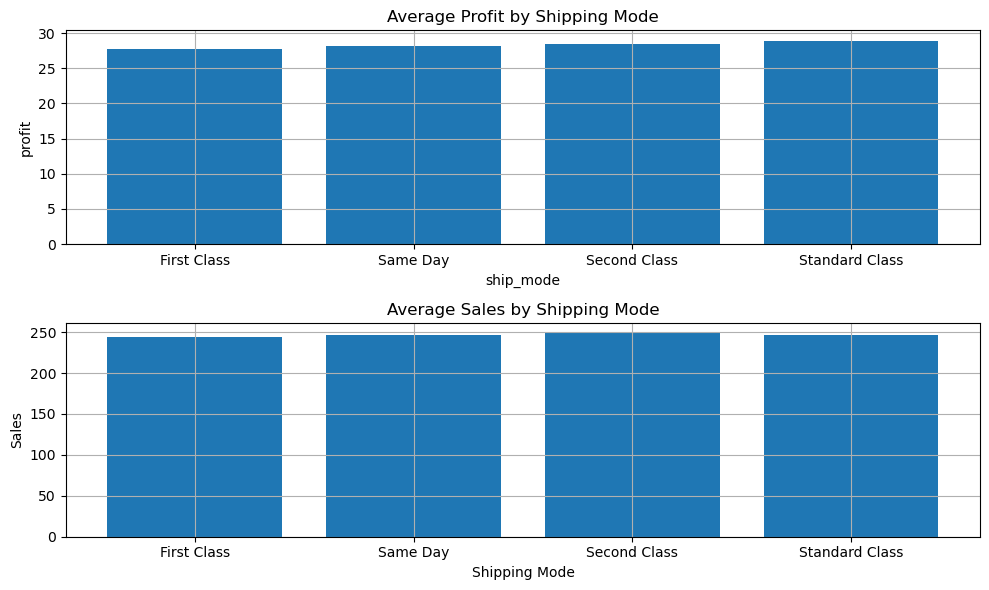

In [132]:
# Group the data by shipping mode and calculate the mean profit and sales for each mode
grouped_data = df2.groupby('ship_mode').agg({'profit': 'mean', 'sales': 'mean'}).reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.bar(grouped_data['ship_mode'], grouped_data['profit'])
plt.xlabel('ship_mode')
plt.ylabel('profit')
plt.title('Average Profit by Shipping Mode')

plt.subplot(2, 1, 2)
plt.bar(grouped_data['ship_mode'], grouped_data['sales'])
plt.xlabel('Shipping Mode')
plt.ylabel('Sales')
plt.title('Average Sales by Shipping Mode')

plt.tight_layout()
plt.show()

### 2- Would sales/profit be affected if we change Order Priority?


#### Order Priority >  Profit

#### Order Priority >  Sales

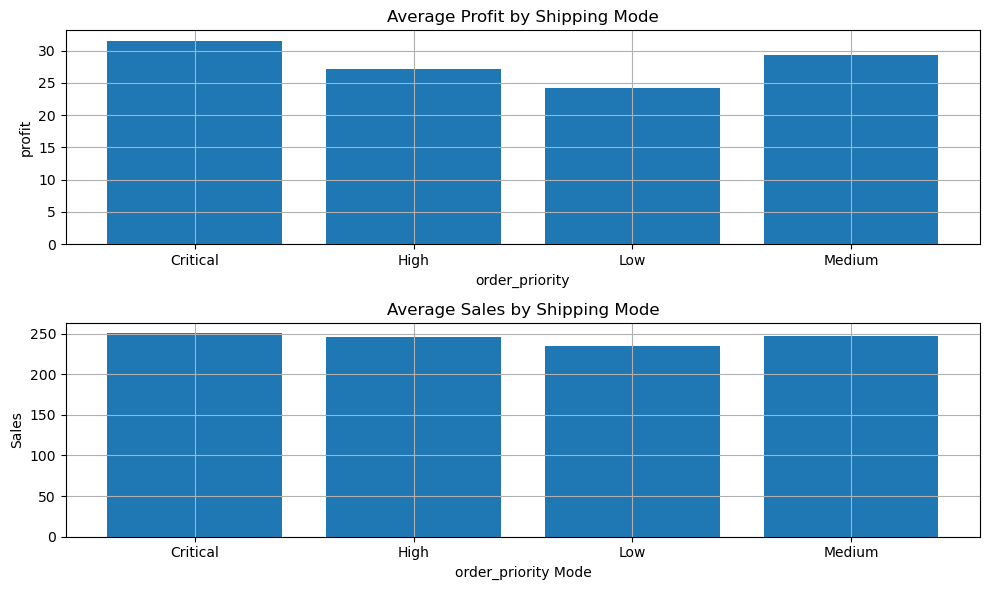

In [133]:
# Group the data by shipping mode and calculate the mean profit and sales for each mode
grouped_data = df2.groupby('order_priority').agg({'profit': 'mean', 'sales': 'mean'}).reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.bar(grouped_data['order_priority'], grouped_data['profit'])
plt.xlabel('order_priority')
plt.ylabel('profit')
plt.title('Average Profit by Shipping Mode')

plt.subplot(2, 1, 2)
plt.bar(grouped_data['order_priority'], grouped_data['sales'])
plt.xlabel('order_priority Mode')
plt.ylabel('Sales')
plt.title('Average Sales by Shipping Mode')

plt.tight_layout()
plt.show()

### 3-How much order will change if we increase/decrease the discount?


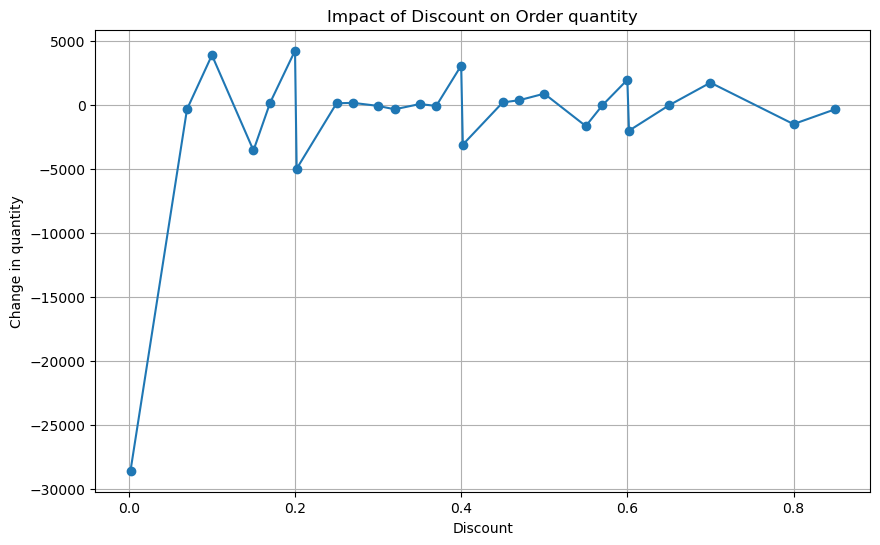

In [145]:

# Calculate the change in order count for different discount levels
discount_changes = df2.groupby('discount')['quantity'].count().diff()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(discount_changes.index, discount_changes.values, marker='o')
plt.xlabel('Discount')
plt.ylabel('Change in quantity')
plt.title('Impact of Discount on Order quantity')
plt.grid(True)
plt.show()

### 4-How much profit will change if we increase/decrease the discount?


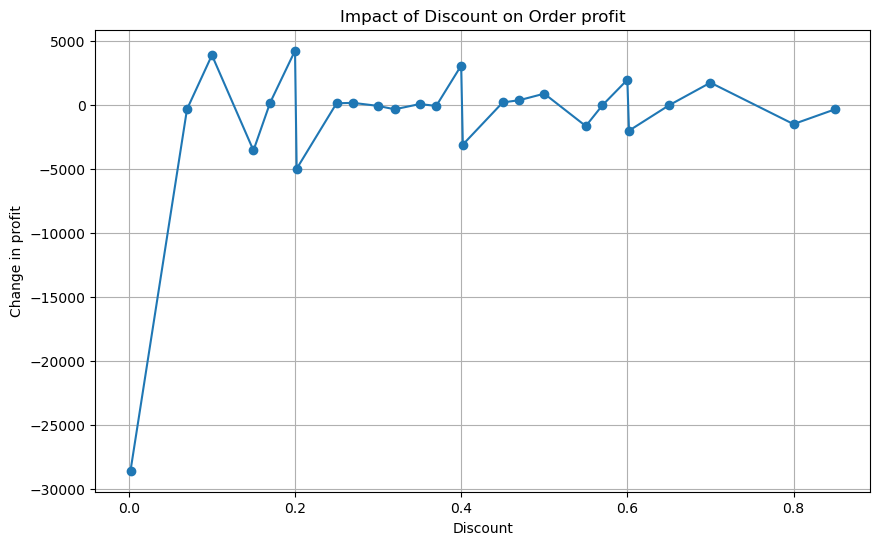

In [146]:
profit_changes = df2.groupby('discount')['profit'].count().diff()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(profit_changes.index, profit_changes.values, marker='o')
plt.xlabel('Discount')
plt.ylabel('Change in profit')
plt.title('Impact of Discount on Order profit')
plt.grid(True)
plt.show()

# Data analytics life cycle

## Building And training model

### Predict product price based on some features
   - Linear Regression


we need to make price column for predicting nd add it to our data set

In [151]:
# Calculate the price column
df2['Price'] = df2['sales'] - df2['discount'] - df2['shipping_cost']
# Drop the 'Customer Name' column
df2 = df2.drop('customer_name', axis=1)

# Save the updated dataset to a new CSV file
df2.to_csv("df3.csv", index=False)

In [153]:
df3=pd.read_csv('df3.csv')
df3.head()

,index,order_date,ship_date,ship_mode,segment,city,state,country,market,region,category,sub-category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,Month,monthes,Price
0,0,2011-01-01,2011-06-01,Standard Class,Consumer,Constantine,Constantine,Algeria,Africa,Africa,Office Supplies,Storage,"Tenex Lockers, Blue",408.30,2,0.00,106.14,35.46,Medium,1,5,372.84
1,1,2011-01-01,2011-08-01,Standard Class,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.37,3,0.10,36.04,9.72,Medium,1,5,110.55
2,2,2011-01-01,2011-05-01,Second Class,Consumer,Budapest,Budapest,Hungary,EMEA,EMEA,Office Supplies,Storage,"Tenex Box, Single Width",66.12,4,0.00,29.64,8.17,High,1,5,57.95
3,3,2011-01-01,2011-05-01,Second Class,Home Office,Stockholm,Stockholm,Sweden,EU,North,Office Supplies,Paper,"Enermax Note Cards, Premium",44.87,3,0.50,-26.05,4.82,High,1,5,39.55
4,4,2011-01-01,2011-08-01,Standard Class,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.67,5,0.10,37.77,4.70,Medium,1,5,108.87


In [155]:
df3.shape

(51290, 22)

In [156]:
df3.columns

Index(['index', 'order_date', 'ship_date', 'ship_mode', 'segment', 'city', 'state', 'country', 'market', 'region', 'category', 'sub-category', 'product_name', 'sales', 'quantity', 'discount', 'profit', 'shipping_cost', 'order_priority', 'Month', 'monthes', 'Price'], dtype='object')

In [185]:
df3.index

RangeIndex(start=0, stop=51290, step=1)

In [186]:
y = df3['Price']
 
x1 = df3['sales']

In [187]:
 df3['sales'].max()

22638.48

In [188]:
df3['Price'].max()

22613.69

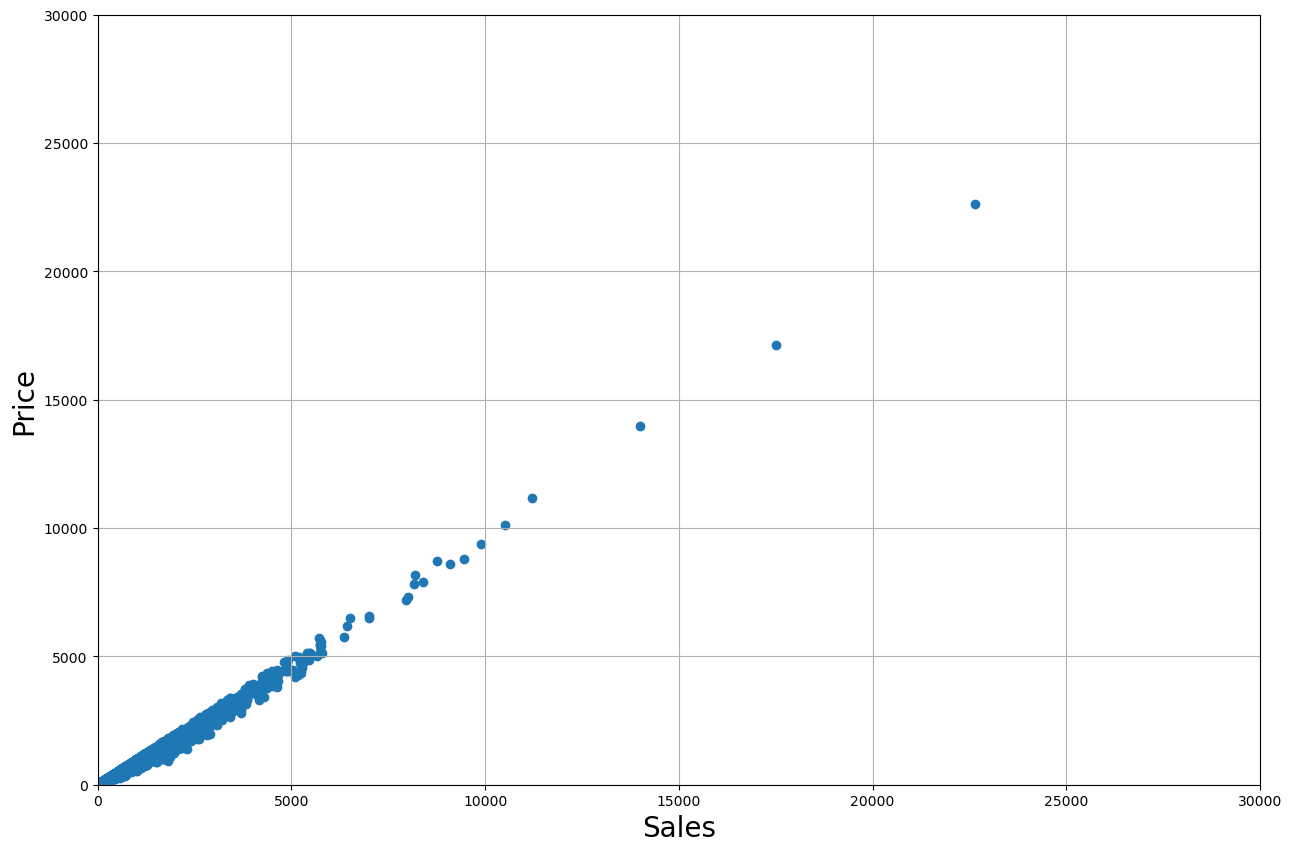

In [191]:
plt.scatter(x1,y)
plt.axis([0, 30000, 0, 30000])
plt.xlabel('Sales', fontsize = 20)
 
plt.ylabel('Price', fontsize = 20)
 
plt.show()

##  Model  Selection

### Predict product price based on some features
   
   - Linear Regression

  
   


In [192]:
import statsmodels.api as sm
x = sm.add_constant(x1)

In [193]:
x = sm.add_constant(x1)
 
results = sm.OLS(y,x).fit()
 
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                 7.498e+06
Date:                Fri, 29 Sep 2023   Prob (F-statistic):               0.00
Time:                        01:18:39   Log-Likelihood:            -2.5755e+05
No. Observations:               51290   AIC:                         5.151e+05
Df Residuals:                   51288   BIC:                         5.151e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.2797      0.182    -23.577      0.000      -4.635      -3.924
sales          0.9098      0.000   2738.173      0.000       0.909       0.910
==============================================================================
Omnibus:                    31991.066   Durbin-Watson:                   1.607
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        203170481.648
Skew:                           1.208   Prob(JB):                         0.00
Kurtosis:                     311.323   Cond. No.                         612.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

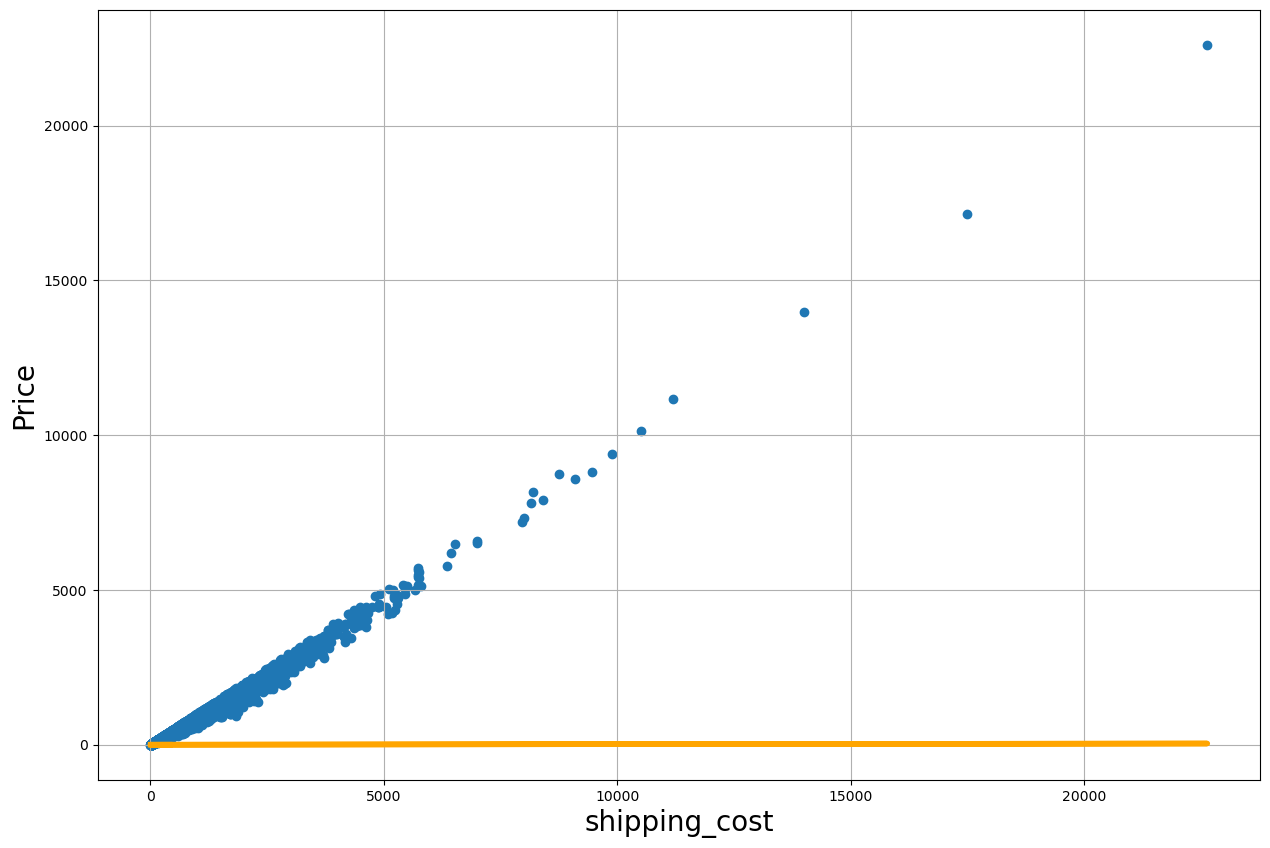

In [194]:
plt.scatter(x1,y)
 
yhat = 0.0017*x1 + 0.275
 
fig = plt.plot(x1,yhat, lw=4, c='orange', label = 'regression line')
 
plt.xlabel('shipping_cost', fontsize = 20)
 
plt.ylabel('Price', fontsize = 20)
 
plt.show()

In [197]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [207]:
# Separate the features (X) and target variable (y)
X = df3[['sales','quantity']]

Y = df3['Price']

In [208]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [209]:
# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [210]:
# Predict prices for the test set
y_pred = model.predict(X_test)

In [211]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('R-squared:', r2)

Mean Squared Error: 1652.678131633953
R-squared: 0.9924342492675572
